# Evaluamos con algunas métricas

In [ ]:
# files_auc = [
#     f'{base_path}/{metric}_kernel_shap_sumcons_p{{}}_w{{}}_f{{}}_m{{}}_{intersection}.tsv',
#     f'{base_path}/{metric}_linear_regression_noreg_noweights_p{{}}_w{{}}_f{{}}_m{{}}_{intersection}.tsv',
#     f'{base_path}/{metric}_tree_importance_p{{}}_w{{}}_f{{}}_m{{}}_{intersection}.tsv',
# ]


# ps = [0.2, 0.3, 0.4]
# ws = [1, 3, 5]
# fs = ['euclidean']
# ms = ['zeros', 'stat', 'noise']

# dfs = []
# for method, file_template in zip(methods, files_auc):
#     for p, w, f, m in itertools.product(ps, ws, fs, ms):
#         file_path = file_template.format(p, w, f, m)
#         try:
#             df = pd.read_csv(file_path, sep='\t')
#             df['method'] = method
#             df['mask_percentage'] = p
#             df['window_size'] = w
#             df['distance_function'] = f
#             df['masking_strategy'] = m
#             dfs.append(df)
#         except FileNotFoundError:
#             print(f"File not found: {file_path}")

# final_df = pd.concat(dfs, ignore_index=True)
# mean_auc_df = final_df.groupby(['method', 'mask_percentage', 'masking_strategy', 'window_size'])[value].mean().reset_index()


In [ ]:
# TITLE_SIZE = 14
# LABEL_SIZE = 12
# ANNOT_SIZE = 11
# TICK_SIZE = 12

# max_auc = mean_auc_df[value].max()
# min_auc = mean_auc_df[value].min()

# # Create a figure with subplots for each method
# methods = mean_auc_df['method'].unique()
# n_methods = len(methods)

# # Calculate number of columns and rows
# n_cols = 3  # Ceiling division to handle odd numbers
# n_rows =1

# # Create figure with adjusted size
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(7*n_cols, 7*n_rows))
# axes = axes.flatten()  # Flatten axes array for easier iteration

# # Hide extra subplots if number of methods is odd
# if n_methods < len(axes):
#     for idx in range(n_methods, len(axes)):
#         axes[idx].set_visible(False)

# for idx, method in enumerate(methods):
#     ax = axes[idx]

#     # Create pivot table for current method
#     pivot_table = mean_auc_df[mean_auc_df['method'] == method].pivot(
#         index='masking_strategy', 
#         columns=['mask_percentage', 'window_size'], 
#         values=value
#     )

#     # 🔹 Filter df_annotations for the current method
#     annotations = mean_auc_df_combination[mean_auc_df_combination['method'] == method].set_index('name')[value]

#     # 🔹 Extract values for row annotations
#     row_labels = pivot_table.index
#     row_annotations = [annotations.get(label, '') for label in row_labels]  # Get roc_auc or empty string

#     # 🔹 Extract values for column annotations
#     # col_labels = pivot_table.columns
#     # col_annotations = [annotations.get(f"{col[0]}-{col[1]}", '') for col in col_labels]  # Convert tuple to string key

#     # Create heatmap
#     sns.heatmap(
#         pivot_table,
#         annot=pivot_table.applymap(lambda x: f"{x:.2f}".lstrip('0')),
#         cmap="coolwarm",
#         fmt="",
#         ax=ax,
#         vmin=min_auc,
#         vmax=max_auc,
#         cbar=(idx == n_methods-1),
#         annot_kws={'size': ANNOT_SIZE}
#     )
#     all = round(mean_auc_df_combination[(mean_auc_df_combination['method'] == method) & (mean_auc_df_combination['name'] == 'all')][value].values[0], 2)
#     # all = 'not yet'
#     method = method.split('_')[0].capitalize()
#     ax.set_title(f'{metric} for {method} for {dataset}, all {all}', fontsize=TITLE_SIZE, pad=20)
#     ax.set_xlabel('Masking Strategy & Window Size', fontsize=LABEL_SIZE)
#     ax.set_ylabel('Mask Percentage', fontsize=LABEL_SIZE)

#     # Set tick label sizes
#     ax.tick_params(axis='both', which='major', labelsize=TICK_SIZE)
#     ax.tick_params(axis='x', rotation=45)
#     if idx == n_methods-1:
#         cbar = plt.colorbar(ax.collections[0], ax=ax, fraction=0.02, pad=0.04)
#         cbar.ax.tick_params(labelsize=4)
#     # 🔹 **Annotate rows (masking strategies)**
#     for i, valu in enumerate(row_annotations):
#         ax.text(pivot_table.shape[1] + 0.5, i + 0.5, f"{valu:.2f}" if valu else "", 
#                 ha='center', va='center', fontsize=ANNOT_SIZE, color='black', fontweight='bold')

#     # 🔹 **Annotate columns (mask percentages & window sizes)**
#     # for j, valu in enumerate(col_annotations):
#     #     ax.text(j + 0.5, -0.5, f"{valu:.2f}" if valu else "", 
#     #             ha='center', va='center', fontsize=ANNOT_SIZE, color='black', fontweight='bold')

# plt.tight_layout()
# plt.show()


# Drums - KWS - Audioset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

metric = 'auc_relaxed'

dataset = 'cough'
base_path = f'/home/ec2-user/evaluations/{dataset}'

if metric == 'auc':
    value = 'roc_auc'
    intersection = '0.05'
if metric == 'leo_metric':
    value = 'leo_metric'
    intersection = '0'
if metric == 'auc_relaxed':
    value = 'roc_auc'
    intersection = '0.09'

In [6]:
files_auc_complete = [
    f'{base_path}/{metric}_kernel_shap_sumcons_{{}}_{intersection}.tsv',
    f'{base_path}/{metric}_linear_regression_noreg_noweights_{{}}_{intersection}.tsv',
    f'{base_path}/{metric}_tree_importance_{{}}_{intersection}.tsv',
]

names = ["zeros", "noise"]
methods = ['kernel_shap_sumcons', 'linear_regression_noreg_noweights', 'tree_importance']

df_combinations = []
for method, file_template in zip(methods, files_auc_complete):
    for name in names:
        file_path = file_template.format(name)
        try:
            df_combination = pd.read_csv(file_path, sep='\t')
            df_combination['method'] = method
            df_combination['name'] = name
            df_combinations.append(df_combination)
        except FileNotFoundError:
            print(f"File not found: {file_path}")
            
final_df_combination = pd.concat(df_combinations, ignore_index=True)


EmptyDataError: No columns to parse from file

In [4]:
mean_auc_df_combination = final_df_combination.groupby(['method', 'name'])[value].mean().reset_index()
mean_auc_df_combination

,method,name,roc_auc
0,kernel_shap_sumcons,noise,0.780925
1,kernel_shap_sumcons,zeros,0.729340
2,linear_regression_noreg_noweights,noise,0.831339
3,linear_regression_noreg_noweights,zeros,0.786017
4,tree_importance,noise,0.893134
5,tree_importance,zeros,0.783769


# Faithfulness


In [40]:
import numpy as np

def compute_log_odds(scores):
    def softmax(x):
        exp_x = np.exp(x - np.max(x))  
        return exp_x / exp_x.sum()

    scores_array = np.array(scores)

    if scores_array.ndim == 1:
        probs = softmax(scores_array)
    else: 
        probs = np.apply_along_axis(softmax, axis=1, arr=scores_array)

    log_odds = np.log(probs / (1 - probs))
    return log_odds.tolist()


In [70]:
import ast

metric = 'score_curve'
methods = ['kernel_shap_sumcons', 'linear_regression_noreg_noweights', 'tree_importance']

dataset = 'drums'
base_path = f'/home/ec2-user/evaluations/{dataset}'

files_auc_complete = [
    f'{base_path}/{metric}_kernel_shap_sumcons_{{}}.tsv',
    f'{base_path}/{metric}_linear_regression_noreg_noweights_{{}}.tsv',
    f'{base_path}/{metric}_tree_importance_{{}}.tsv',
]

names = ["zeros", "noise", "stat", "all"]
# names=['zeros', 'noise']
metric = 'score_curve'

df_combinations = []
for method, file_template in zip(methods, files_auc_complete):
    for name in names:
        file_path = file_template.format(name)
        try:
            df_combination = pd.read_csv(file_path, sep='\t')
            df_combination['method'] = method
            df_combination['name'] = name
            if metric == 'score_curve':
                df_combination['actual_score'] = df_combination['actual_score'].apply(ast.literal_eval)
                df_combination['score_curve_sacando_topk'] = df_combination['score_curve_sacando_topk'].apply(ast.literal_eval)
                df_combination['event_label'] = df_combination['event_label'].apply(int)

                df_combination['log_odds'] = df_combination['actual_score'].apply(compute_log_odds)
                df_combination['log_odds_curve'] = df_combination['score_curve_sacando_topk'].apply(compute_log_odds)

                percentages = [0.01, 0.05, 0.1, 0.25, 0.3, 0.4, 0.5]
                for i in percentages:
                    df_combination[f'top_{i}'] = df_combination.apply(
                        lambda row: row['log_odds'][row['event_label']] - row['log_odds_curve'][int(len(row['score_curve_sacando_topk']) * i)][row['event_label']],
                        axis=1
                    )

        except FileNotFoundError:
            print(f"File not found: {file_path}")

        df_combinations.append(df_combination)
            
final_df_combination = pd.concat(df_combinations, ignore_index=True)

In [76]:
test = final_df_combination_auc[final_df_combination_auc['name'].isin(['zeros'])  & final_df_combination_auc['method'].isin(['tree_importance'])]
test1 = final_df_combination[final_df_combination['name'].isin(['zeros']) & final_df_combination['method'].isin(['tree_importance'])]

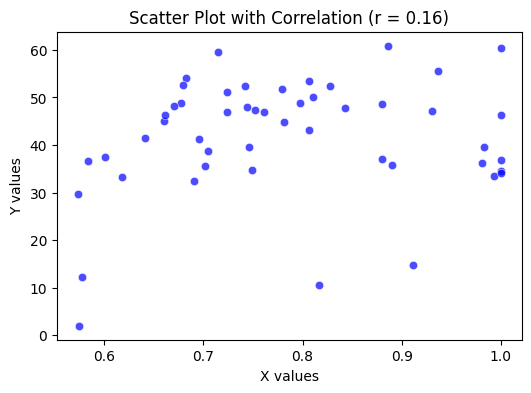

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

corr, _ = pearsonr(test['roc_auc'], test1['top_0.25'])

# Create scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=test['roc_auc'], y=final_df_combination['top_0.25'], color="blue", alpha=0.7)
plt.title(f"Scatter Plot with Correlation (r = {corr:.2f})")
plt.xlabel("X values")
plt.ylabel("Y values")

# Show plot
plt.show()

In [46]:
top_k_values = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
mean_auc_df_combination = final_df_combination.groupby(['method', 'name'])[
    [f'top_{i}' for i in top_k_values]
].mean().reset_index()
mean_auc_df_combination

,method,name,top_0.01,top_0.05,top_0.1,top_0.2,top_0.3,top_0.4,top_0.5
0,kernel_shap_sumcons,all,5.725856,12.792137,16.580405,21.738282,23.770278,24.584969,24.416737
1,kernel_shap_sumcons,noise,4.814108,11.691838,15.265576,17.529820,17.048706,13.524813,8.466364
2,kernel_shap_sumcons,stat,7.971662,14.699577,19.785671,25.687070,29.575641,31.629639,32.706527
3,kernel_shap_sumcons,zeros,7.968621,14.841953,20.056012,26.121658,30.173916,32.491917,33.993569
4,linear_regression_noreg_noweights,all,6.046487,13.182638,17.017217,22.308883,24.913909,25.927298,25.479728
5,linear_regression_noreg_noweights,noise,5.104418,11.936985,15.134013,17.778515,17.916494,15.730066,12.184072
6,linear_regression_noreg_noweights,stat,7.882723,14.936860,19.884967,25.917244,29.906178,32.464521,33.773257
7,linear_regression_noreg_noweights,zeros,7.893128,14.954298,20.026325,26.284015,30.579531,33.451680,35.159156
8,tree_importance,all,6.698259,13.188518,16.113573,19.365243,20.273041,20.701104,19.553388
9,tree_importance,noise,4.621371,7.595605,5.866789,2.000747,0.126366,-0.820640,-3.579381


In [28]:
top_k_values = [1, 3, 5, 10]

# Compute the mean for each top_k value grouped by 'method' and 'name'
mean_auc_df_combination = final_df_combination.groupby(['method', 'name'])[
    [f'top_{i}' for i in top_k_values]
].mean().reset_index()

mean_auc_df_combination.to_csv(f'/home/ec2-user/evaluations/{dataset}/faithfulness.csv', index=False)

# Drums test

In [7]:
base_path = f'/home/ec2-user/evaluations/drums'
metric = 'order'
names = ["zeros", "noise"]
methods = ['kernel_shap_sumcons', 'linear_regression_noreg_noweights', 'tree_importance']

files_auc_complete = [
    f'{base_path}/{metric}_kernel_shap_sumcons_{{}}_{{}}.tsv',
    f'{base_path}/{metric}_linear_regression_noreg_noweights_{{}}_{{}}.tsv',
    f'{base_path}/{metric}_tree_importance_{{}}_{{}}.tsv',
]
names = ["zeros", "noise"]

df_combinations = []
for method, file_template in zip(methods, files_auc_complete):
    for i in [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]:
        for name in names:
            file_path = file_template.format(name, i)
            try:
                df_combination = pd.read_csv(file_path, sep='\t')
                if method == 'tree_importance':
                    df_combination['method'] = 'RF'
                if method == 'linear_regression_noreg_noweights':
                    df_combination['method'] = 'LR'
                if method == 'kernel_shap_sumcons':
                    df_combination['method'] = 'SHAP'
                df_combination['name'] = name
                df_combination['final'] = i
                df_combinations.append(df_combination)
            except FileNotFoundError:
                print(f"File not found: {file_path}")
                
final_df_combination = pd.concat(df_combinations, ignore_index=True)


In [9]:
final_df_combination['group'] = final_df_combination['method'] + '_' + \
                    final_df_combination['name'].astype(str)

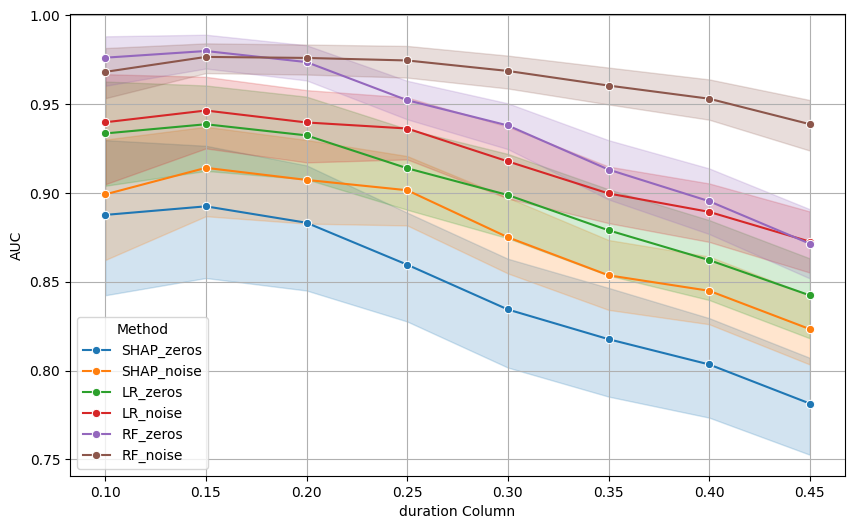

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=final_df_combination, x="final", y="roc_auc", hue="group", marker="o")

# Labels and Title
plt.xlabel("duration Column")
plt.ylabel("AUC")

# Show the plot
plt.legend(title="Method")
# plt.legend().remove()

plt.grid(True)
plt.show()